In [ ]:
import pandas as pd


In [ ]:
df_actual = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment: Expression of Genes in AML and ALL type Leukemia/datasets/crawford/actual.csv",index_col='patient')
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment: Expression of Genes in AML and ALL type Leukemia/datasets/crawford/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment: Expression of Genes in AML and ALL type Leukemia/datasets/crawford/data_set_ALL_AML_independent.csv")

In [ ]:
df_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


# Drop 'Gene Description' and all 'call' columns


In [ ]:
X_train = df_train.drop(columns="Gene Description")
X_test = df_test.drop(columns="Gene Description")

X_train = X_train.loc[:, ~X_train.columns.str.contains('call', case=False)]
X_test = X_test.loc[:, ~X_test.columns.str.contains('call', case=False)]

X_train = X_train.T
X_test = X_test.T

X_train.columns = X_train.iloc[0]
X_train = X_train[1:]
X_train.columns.name = None
X_train.index = X_train.index.astype(int)
X_train = X_train.sort_index()
X_train.index.name = 'patient'

X_test.columns = X_test.iloc[0]
X_test = X_test[1:]
X_test.columns.name = None
X_test.index = X_test.index.astype(int)
X_test = X_test.sort_index()
X_test.index.name = 'patient'

In [ ]:
df_actual = df_actual.replace({'ALL': 0, 'AML': 1}).infer_objects(copy=False)
labels = ['ALL', 'AML']
Y_train = df_actual.iloc[:38]
Y_test = df_actual.iloc[38:]

<ipython-input-86-c8d143f49bdf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_actual = df_actual.replace({'ALL': 0, 'AML': 1}).infer_objects(copy=False)


In [ ]:
X_train.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
patient,,,,,,,,,,,,,,,,,,,,,
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
Y_train.head()

,cancer
patient,
1,0
2,0
3,0
4,0
5,0


In [ ]:
X_test.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
patient,,,,,,,,,,,,,,,,,,,,,
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [ ]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 39 to 72
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cancer  34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


# Model Training & Testing

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

convert Y labels into an 1D array

In [ ]:
df_actual = df_actual['cancer'].to_numpy().ravel()
Y_train = df_actual[:38]
Y_test = df_actual[38:]

**Decision tree model**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=0)

Decision Tree Classifier accuracy: 0.912


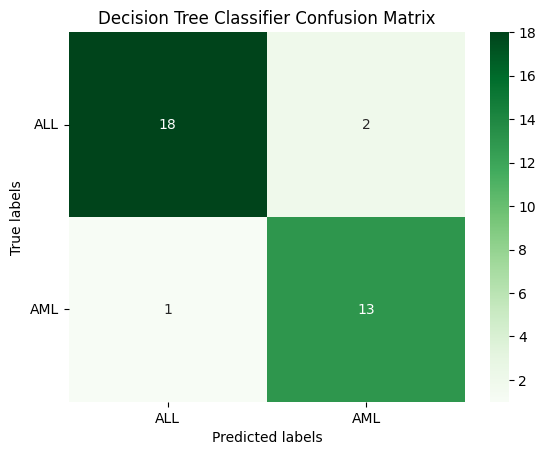

In [ ]:
dt_pred = dt_model.predict(X_test)

print('Decision Tree Classifier accuracy:', round(accuracy_score(Y_test, dt_pred), 3))

cm_dt = confusion_matrix(Y_test, dt_pred)

ax = plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax, fmt='g', cmap='Greens')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classifier Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

*Hyperparameter tuning using Grid search for Decision tree model*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, Y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Decision Tree Classifier accuracy: 0.912


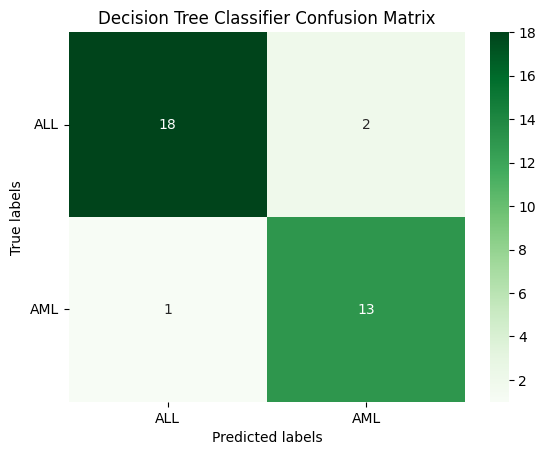

In [ ]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

dt_model.fit(X_train, Y_train)

dt_pred = dt_model.predict(X_test)

print('Decision Tree Classifier accuracy:', round(accuracy_score(Y_test, dt_pred), 3))

cm_dt = confusion_matrix(Y_test, dt_pred)

ax = plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax, fmt='g', cmap='Greens')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classifier Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

**Logistic regresion model**

In [ ]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,Y_train.reshape(-1,))

LogisticRegression(random_state=0)

Logistic Regression accuracy: 0.941


[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'AML')]

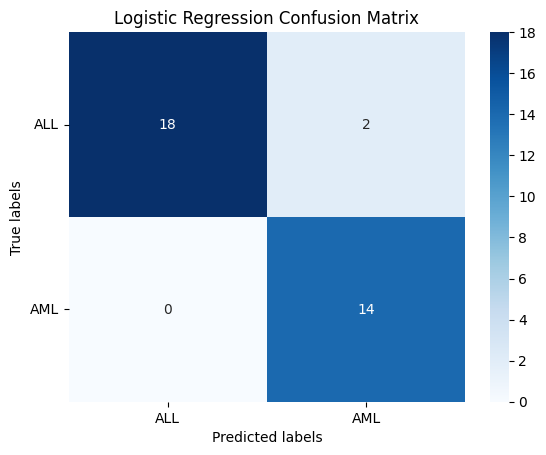

In [ ]:
lr_pred = lr_model.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(Y_test, lr_pred), 3))

cm_lr = confusion_matrix(Y_test, lr_pred)

ax = plt.subplot()
sns.heatmap(cm_lr, annot=True, ax=ax, fmt='g', cmap='Blues')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360)

*Hyperparameter tuning using Grid search for linear regression model*

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # liblinear supports l1/l2
}

lr = LogisticRegression(max_iter=10000, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, Y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Logistic Regression accuracy: 1.0


[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'AML')]

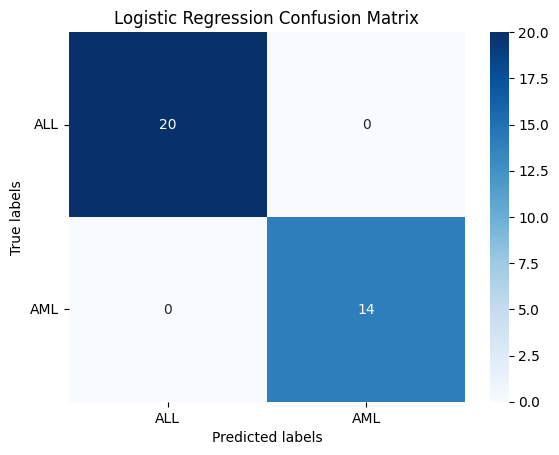

In [ ]:
lr_model = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    max_iter=10000,
    random_state=42
)
lr_model.fit(X_train,Y_train.reshape(-1,))
lr_pred = lr_model.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(Y_test, lr_pred), 3))

cm_lr = confusion_matrix(Y_test, lr_pred)

ax = plt.subplot()
sns.heatmap(cm_lr, annot=True, ax=ax, fmt='g', cmap='Blues')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360)

# Model Interpretation


In [ ]:
import numpy as np

# Extract absolute values of model coefficients (indicates strength of influence)
coefficients = np.abs(lr_model.coef_.ravel())  # Higher value = greater influence on prediction

scaled_importance = np.std(X_train, axis=0) * coefficients

importance_series = pd.Series(scaled_importance, index=X_train.columns)

top_features = importance_series.sort_values(ascending=False)

print("Top 15 genes assosoated with model prediction:")
print(top_features.head(15))


Top 15 genes assosoated with model prediction:
M27891_at             0.808266
M19507_at             0.802134
Y00787_s_at           0.749833
L06797_s_at           0.617295
M28130_rna1_s_at      0.612356
M96326_rna1_at        0.579814
U01317_cds4_at         0.57841
M91438_at             0.556729
M91036_rna1_at        0.518216
M92287_at             0.473878
V00594_s_at           0.421673
X82240_rna1_at        0.414467
L13210_at             0.367476
M84526_at             0.346342
HG3576-HT3779_f_at    0.334621
dtype: object


<ipython-input-127-b2e6e5d30ecc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15.values, y=top_15.index, palette="viridis")


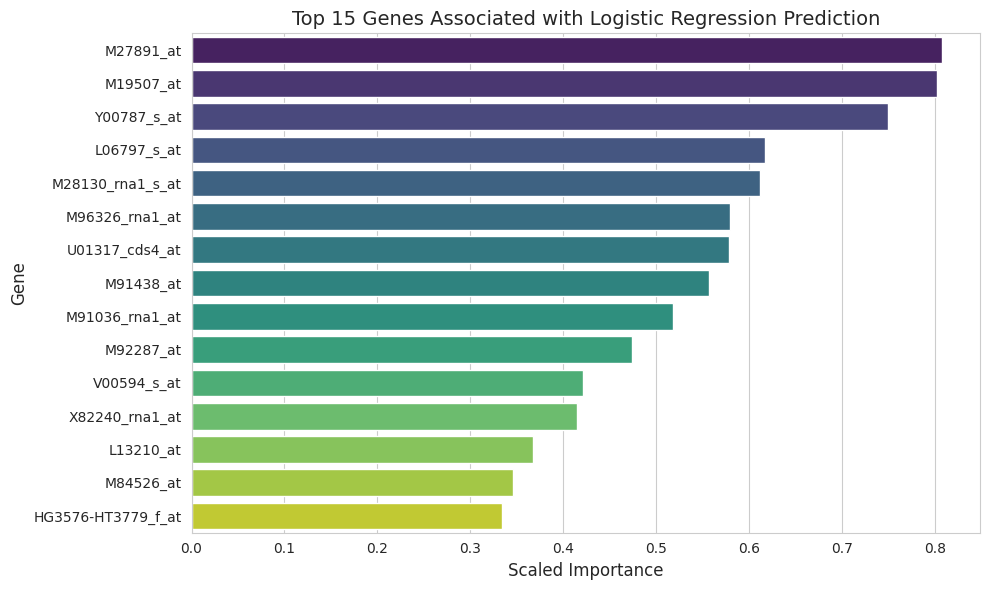

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_15 = top_features.head(15)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(x=top_15.values, y=top_15.index, palette="viridis")

plt.title("Top 15 Genes Associated with Logistic Regression Prediction", fontsize=14)
plt.xlabel("Scaled Importance", fontsize=12)
plt.ylabel("Gene", fontsize=12)

plt.tight_layout()
plt.show()


# Clustering (Unsupervised Techniques)


**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Compute purity
cluster_labels = pd.DataFrame({'cluster': clusters, 'true_label': Y_train})
majority_vote = cluster_labels.groupby('cluster')['true_label'].agg(lambda x: x.value_counts().index[0])
mapped_preds = cluster_labels['cluster'].map(majority_vote)
purity = accuracy_score(Y_train, mapped_preds)
print("purity : " , purity)


purity :  0.7631578947368421


**Hierarchical Clustering (Agglomerative)**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2)
clusters = hc.fit_predict(X_train)
# Compute purity
cluster_labels = pd.DataFrame({'cluster': clusters, 'true_label': Y_train})
majority_vote = cluster_labels.groupby('cluster')['true_label'].agg(lambda x: x.value_counts().index[0])
mapped_preds = cluster_labels['cluster'].map(majority_vote)
purity = accuracy_score(Y_train, mapped_preds)
print("purity : " , purity)

purity :  0.8157894736842105
